In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
import tqdm
from pathlib import Path

from tracker.dataset import Combined
from tracker.t_model import CNNLSTM
from tracker.loss import EuclideanLoss
from tracker.train import train_epoch, eval_model, calc_loss

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
ds = Combined('IBTrACS.WP.v04r00.nc', 'data/batched', seq_len=24)

  0%|          | 0/19501 [00:00<?, ?it/s]

In [3]:
test_ds = torch.utils.data.Subset(ds, range(int(len(ds)*0.8),len(ds)))
tr_ds = torch.utils.data.Subset(ds,range(0,int(len(ds)*0.8)))
_len = int(len(tr_ds)*0.8)
tr_ds, val_ds = torch.utils.data.random_split(tr_ds, [_len, len(tr_ds)-_len], generator=torch.Generator().manual_seed(9))

loss_func = EuclideanLoss().to(DEVICE)

In [4]:
epochs = 400

learning_rate = 0.01
name = 'Sample_run'

best_epoch = -1
best_loss = 1

path = Path(f'runs/{name}')
path.mkdir(parents=True, exist_ok=True)
    
tr_loader = DataLoader(tr_ds, batch_size=256)
val_loader = DataLoader(val_ds, batch_size=256)

model = CNNLSTM().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.02)
loss_func = loss_func.to(DEVICE)

for i in range(epochs):
    train_epoch(model, optimizer, tr_loader, loss_func, DEVICE, i + 1)

    obs, preds = eval_model(model, val_loader, DEVICE)
    
    eval_loss = calc_loss(obs, preds, DEVICE)
    
    if eval_loss <= best_loss:
        best_loss = eval_loss
        best_epoch = i+1

    torch.save(model.state_dict(), path/f'epoch_{i+1}')

    tqdm.tqdm.write(f"Validation loss: {eval_loss:.4f}")

  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 88.9352


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 12.9495


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 5.0832


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 5.8028


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 2.9931


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 2.1847


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.9975


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 2.2891


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.8947


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.9330


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 2.0552


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.9384


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.9719


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.9556


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.1830


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.0313


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.9604


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.0218


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.9396


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.9047


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.9514


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8602


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8844


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8532


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7608


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7033


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8685


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7736


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7248


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7671


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7619


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6890


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6953


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6904


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6531


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6941


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6990


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7140


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7435


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8340


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.9030


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8110


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7533


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7371


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7152


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7507


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7607


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8952


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8563


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8596


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.9677


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.0932


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.5668


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 2.2331


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 2.0543


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.8237


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.2448


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8824


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.1686


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.1809


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.2373


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.2415


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.1392


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.0943


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 1.0722


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.9205


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8184


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8325


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6975


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6664


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5732


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6227


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5520


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5618


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6023


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4804


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6252


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6372


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5075


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5257


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5769


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6117


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4320


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4685


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6197


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4698


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7133


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4558


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6653


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5709


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4214


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5924


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4941


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6204


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5436


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5409


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5152


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4766


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5971


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4895


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5728


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5408


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4711


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4309


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5054


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4476


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5001


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3641


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3667


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4726


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3597


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3832


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4029


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4332


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4080


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3395


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4078


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4443


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3782


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4588


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3711


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3962


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4043


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4008


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4104


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3922


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3403


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3620


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2867


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3325


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3254


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4406


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3737


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3241


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3526


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4323


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3276


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4362


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3097


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3116


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3814


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3575


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3634


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4687


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3234


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3816


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5931


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3465


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4594


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3445


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3361


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3191


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2993


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3740


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3511


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3853


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3188


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3444


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3400


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4317


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3180


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3639


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3649


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4779


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3165


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3155


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4276


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2899


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3179


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3406


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3471


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6602


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2629


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2441


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2490


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2599


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2752


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2981


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3765


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3109


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2830


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3303


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3346


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3031


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3175


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2761


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2951


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3282


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4178


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3306


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4190


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2505


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2909


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3094


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2634


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2339


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2551


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2678


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2588


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2604


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2831


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2559


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3932


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3684


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3224


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2715


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2679


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3768


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2846


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2886


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2981


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5196


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6004


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7932


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8886


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5041


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5969


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5799


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5636


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5327


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7209


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5720


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5183


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5597


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6173


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.8887


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6539


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4532


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5153


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5465


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6278


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6293


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6760


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5714


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4174


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4270


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4106


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2733


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2838


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2411


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2350


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2658


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2841


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2402


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2504


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3278


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2319


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2687


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2377


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2458


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2621


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2611


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2438


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2753


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2498


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2355


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2743


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2649


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6855


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3826


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3580


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3372


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2321


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3117


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4089


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4538


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4401


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2825


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3411


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3030


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3762


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2415


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3383


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2457


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2451


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2398


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2348


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2404


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2587


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2459


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2819


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3863


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2689


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2521


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2431


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3069


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3001


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2405


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2304


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2566


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2426


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3012


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2455


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2457


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2632


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4705


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3806


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3293


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2996


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2587


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3437


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3341


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4120


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3854


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5848


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5178


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3994


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3549


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4109


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2733


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2879


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2460


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2506


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2347


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2738


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2626


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2486


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2561


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2501


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2437


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2454


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2482


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2637


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2743


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2449


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2817


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2755


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2680


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2552


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2922


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2874


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2435


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2703


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6063


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7303


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4320


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5130


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3379


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3631


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4464


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5929


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4659


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6172


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3002


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6496


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4431


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5709


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.5121


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4172


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4358


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2448


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2442


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3019


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3049


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2716


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2438


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2442


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2673


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2607


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2787


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2648


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2912


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3489


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3112


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2684


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2697


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2455


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3164


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3191


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3378


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3251


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3717


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3065


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2411


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2465


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2634


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2565


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3084


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3305


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2530


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2430


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2708


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2842


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2676


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2816


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.3494


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.4110


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2987


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2528


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2541


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2988


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2718


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2401


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2703


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2729


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2585


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2657


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.2746


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.7147


  0%|          | 0/49 [00:00<?, ?it/s]

Validation loss: 0.6205


In [5]:
# testing
test_loader = DataLoader(test_ds, batch_size=256)
test_model = CNNLSTM().to(DEVICE)
test_model.load_state_dict(torch.load(path/f'epoch_{best_epoch}'))
obs, preds = eval_model(test_model, test_loader, DEVICE)
eval_loss = calc_loss(obs, preds, DEVICE)
print(eval_loss)

tensor(0.2423, device='cuda:0')


In [6]:
# data of Typhoon Hagibis (Typhoon No.19) for plotting/demonstration
hagibis_ds = torch.utils.data.Subset(ds, range(18386, 18447))
hagibis_loader = DataLoader(hagibis_ds, batch_size=2048)


In [8]:
obs, preds = eval_model(test_model, hagibis_loader, DEVICE)
eval_loss = calc_loss(obs, preds, DEVICE)

# rescale to lat/lon
a = torch.tensor([[70, 0], [0, 100]], dtype=torch.float)
b = torch.tensor([[0, 120]], dtype=torch.float)
_obs = obs.cpu() @ a + b
_pred = preds.cpu()  @ a + b

observation = _obs.numpy()
prediction = _pred.numpy()

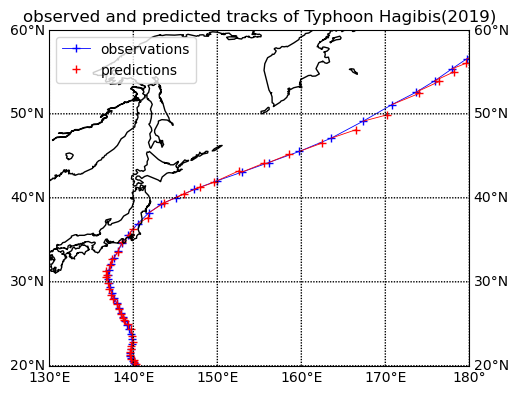

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(1)
ax = fig.add_axes([0.15, 0.15, 0.7, 0.7])
m1 = Basemap(llcrnrlon=130, llcrnrlat=20, urcrnrlon=180, urcrnrlat=60, resolution='l')

m1.plot(observation[:,1], observation[:,0], color='b', marker='+', linewidth=0.6, label='observations')
m1.plot(prediction[:,1], prediction[:,0], color='r', marker='+', linestyle='None', label='predictions')

for i in range(1,observation.shape[0]):
    m1.plot([observation[i-1,1], prediction[i,1]], [observation[i-1,0], prediction[i,0]], linewidth=0.6, color='r')
m1.drawcoastlines()
m1.drawmeridians(np.arange(-180, 180, 10), labels=[1,1,0,1])
m1.drawparallels(np.arange(10, 90, 10), labels=[1,1,0,1])
ax.legend()
plt.title('observed and predicted tracks of Typhoon Hagibis(2019)')
plt.show()


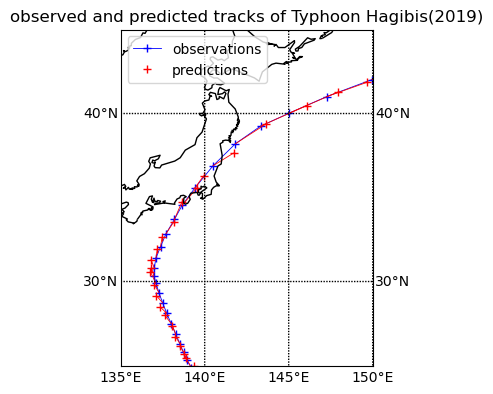

In [27]:
fig = plt.figure(2)
ax = fig.add_axes([0.15, 0.15, 0.7, 0.7])
m2 = Basemap(llcrnrlon=135, llcrnrlat=25, urcrnrlon=150, urcrnrlat=45, resolution='l')

m2.plot(observation[:,1], observation[:,0], color='b', marker='+', linewidth=0.6, label='observations')
m2.plot(prediction[:,1], prediction[:,0], color='r', marker='+', linestyle='None', label='predictions')

for i in range(1,observation.shape[0]):
    m2.plot([observation[i-1,1], prediction[i,1]], [observation[i-1,0], prediction[i,0]], linewidth=0.6, color='r')
m2.drawcoastlines()
m2.drawmeridians(np.arange(-180, 180, 5), labels=[1,1,0,1])
m2.drawparallels(np.arange(10, 90, 10), labels=[1,1,0,1])
ax.legend()
plt.title('observed and predicted tracks of Typhoon Hagibis(2019)')
plt.show()
